<a href="https://colab.research.google.com/github/repoocsov/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-15 22:40:51--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.32.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.32.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  35.5MB/s    in 6.1s    

2020-01-15 22:40:57 (32.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

# Creating dataframes
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')

# concatinating train and prior dataframes
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

order_products_df = pd.concat([order_products__train, order_products__prior], axis=0)

In [0]:
# DATAFRAMES AND THEIR COLUMNS
products_df # product_id,	  product_name,  	aisle_id,	  department_id
orders_df # order_id,  	user_id,	  eval_set,	  order_number,	  order_dow,  	order_hour_of_day,  	days_since_prior_order
order_products_df # order_id,  	product_id,	  add_to_cart_order,  	reordered


# ---------COLUMNS NEEDED RESPECTIVELY--------
# product_id,	product_name
# NONE
# order_id, product_id


# Dropping uneeded columns
products_df = products_df.drop(['aisle_id', 'department_id'], axis=1)
orders_df = orders_df.drop(['order_id', 'user_id',	'eval_set',	'order_dow', 'order_hour_of_day', 'days_since_prior_order'], axis=1)
order_products_df = order_products_df.drop(['add_to_cart_order', 'reordered'], axis=1)

In [0]:
# List of products.
"""
Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado
Organic Avocado
Large Lemon
Strawberries
Limes
Organic Whole Milk
"""


# Let's find where product_name == 'Banana' in the products_df dataframe
conditional = (products_df['product_name'] == 'Banana')
df_subset1 = products_df[conditional]
df_subset1 # product_id == 24852

# Let's find where product_name == 'Bag of Organic Bananas' in the products_df dataframe
conditional = (products_df['product_name'] == 'Bag of Organic Bananas')
df_subset2 = products_df[conditional]
df_subset2 # product_id == 13176

# Let's find where product_name == 'Organic Strawberries' in the products_df dataframe
conditional = (products_df['product_name'] == 'Organic Strawberries')
df_subset3 = products_df[conditional]
df_subset3 # product_id == 21137

# Let's find where product_name == 'Organic Baby Spinach' in the products_df dataframe
conditional = (products_df['product_name'] == 'Organic Baby Spinach')
df_subset4 = products_df[conditional]
df_subset4 # product_id == 21903

# Let's find where product_name == 'Organic Hass Avocado' in the products_df dataframe
conditional = (products_df['product_name'] == 'Organic Hass Avocado')
df_subset5 = products_df[conditional]
df_subset5 # product_id == 47209

# Let's find where product_name == 'Organic Avocado' in the products_df dataframe
conditional = (products_df['product_name'] == 'Organic Avocado')
df_subset6 = products_df[conditional]
df_subset6 # product_id == 47766

# Let's find where product_name == 'Large Lemon' in the products_df dataframe
conditional = (products_df['product_name'] == 'Large Lemon')
df_subset7 = products_df[conditional]
df_subset7 # product_id == 47626

# Let's find where product_name == 'Strawberries' in the products_df dataframe
conditional = (products_df['product_name'] == 'Strawberries')
df_subset8 = products_df[conditional]
df_subset8 # product_id == 16797

# Let's find where product_name == 'Limes' in the products_df dataframe
conditional = (products_df['product_name'] == 'Limes')
df_subset9 = products_df[conditional]
df_subset9 # product_id == 26209

# Let's find where product_name == 'Organic Whole Milk' in the products_df dataframe
conditional = (products_df['product_name'] == 'Organic Whole Milk')
df_subset10 = products_df[conditional]
df_subset10 # product_id == 27845

,product_id,product_name
27844,27845,Organic Whole Milk


In [0]:
# Concatenating these 10 dataframes together
ten_products_df = pd.concat([df_subset1, df_subset2, df_subset3, df_subset4, df_subset5, df_subset6, df_subset7, df_subset8, df_subset9, df_subset10], axis=0)
ten_products_df

,product_id,product_name
24851,24852,Banana
13175,13176,Bag of Organic Bananas
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
47208,47209,Organic Hass Avocado
47765,47766,Organic Avocado
47625,47626,Large Lemon
16796,16797,Strawberries
26208,26209,Limes
27844,27845,Organic Whole Milk


In [0]:
# Need to filter the products_df for the following product_id's
# 13176, 24852, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845


conditional = ((order_products_df['product_id'] == 13176) | (order_products_df['product_id'] == 24852) | (order_products_df['product_id'] == 21137)
              | (order_products_df['product_id'] == 21903) | (order_products_df['product_id'] == 47209) | (order_products_df['product_id'] == 47766)
              | (order_products_df['product_id'] == 47626) | (order_products_df['product_id'] == 16797) | (order_products_df['product_id'] == 26209)
               | (order_products_df['product_id'] == 27845))

order_products_df_subset = order_products_df[conditional]
order_products_df_subset # 2,418,314 instances of orders containing one of the 10 products above

,order_id,product_id
5,1,13176
6,1,47209
35,98,13176
85,112,47209
94,170,13176
...,...,...
32434445,3421077,27845
32434447,3421078,24852
32434456,3421080,27845
32434474,3421082,16797


In [0]:
# Merging our ten_products_df and order_products_df_subset
orders_and_products_merged = pd.merge(ten_products_df,
                               order_products_df_subset, 
                               on='product_id', 
                               how='inner')

orders_and_products_merged

# Looks to be what we want...Only the 10 products, their product_id's, and any order_id's associated with them.

,product_id,product_name,order_id
0,24852,Banana,226
1,24852,Banana,473
2,24852,Banana,878
3,24852,Banana,1042
4,24852,Banana,1139
...,...,...,...
2418309,27845,Organic Whole Milk,3421012
2418310,27845,Organic Whole Milk,3421046
2418311,27845,Organic Whole Milk,3421055
2418312,27845,Organic Whole Milk,3421077


In [0]:
# Order counts of each product
orders_and_products_merged['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
#---------------REPLICATING LESSON CODE-------------------
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
# "transpose" this data
table2 = table1.T
table2

# Different ways to display the same data

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# Turning table1 into tidy format...

# Add index
table1 = table1.reset_index()
table1.head()

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
# Specifying the unique identifier and using the melt function to tidy table1
tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# Renaming the columns and cleaning data

tidy1 = tidy1.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy1.trt = tidy1.trt.str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
# pivot_table is the reverse of melt
# Takes the tidy table created above and returns it back into a wide format

wide = tidy1.pivot_table(index='name', columns='trt', values='result')

wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


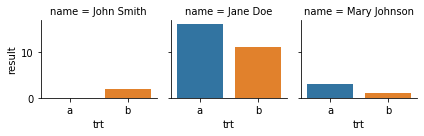

In [0]:
# A lot of libraries work better with data that has been tidied
# Seaborns for example...
import seaborn as sns

sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy1, height=2);

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
#-------------START OF 2ND BULLET POINT ABOVE------------
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy

# Adding index
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
# Melting the dataframe
table2 = table2.melt(id_vars='index' , value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
table2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# Renaming the columns
table2 = table2.rename(columns={
    'variable': 'name',
    'index': 'treatment',
    'value': 'result'
})
table2

,treatment,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# Cleaning data
table2.treatment = table2.treatment.str.replace('treatment', '')
table2 = table2[['name', 'treatment', 'result']]
table2

,name,treatment,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


In [0]:
# tidy -> table2
#-----------------------PIVOT_TABLE-----------------
table2 = table2.pivot_table(index='treatment', columns='name', values='result')
table2

# Index and columns reversed from lesson. values still located in the results column

name,Jane Doe,John Smith,Mary Johnson
treatment,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table
"""
create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns.
You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.
"""
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [0]:
# Creating flights pivot table
flights = flights.pivot_table(index='year', columns='month', values='passengers')
flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####
import pandas as pd

# Creating dataframes
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')

# concatinating train and prior dataframes
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')

order_products_df = pd.concat([order_products__train, order_products__prior], axis=0)

In [190]:
# DATAFRAMES AND THEIR COLUMNS
"""products_df""" # product_id,	  product_name,  	aisle_id,	  department_id
"""orders_df""" # order_id,  	user_id,	  eval_set,	  order_number,	  order_dow,  	order_hour_of_day,  	days_since_prior_order
"""order_products_df""" # order_id,  	product_id,	  add_to_cart_order,  	reordered

'order_products_df'

In [0]:
# reproduce list of top 25 latest ordered products (AFTER 8:00PM && MORE THAN 2900 ORDERS)
#--------NEEDED COLUMNS----------
# product_id, product_name
# order_id, order_hour_of_day
# order_id, product_id

# Dropping uneeded columns
products_df = products_df.drop(['aisle_id', 'department_id'], axis=1)
orders_df = orders_df.drop(['user_id', 'eval_set',	'order_number',	'order_dow', 'days_since_prior_order'], axis=1)
order_products_df = order_products_df.drop(['add_to_cart_order', 'reordered'], axis=1)

In [205]:
products_df
orders_df
order_products_df


condition = orders_df['order_hour_of_day'] >= 20
orders_df_subset = orders_df[condition]
orders_df_subset

order_products_and_orders_merged = pd.merge(orders_df_subset,
                               order_products_df, 
                               on='order_id', 
                               how='inner')

order_products_and_orders_AND_products_merged = pd.merge(order_products_and_orders_merged,
                               products_df, 
                               on='product_id', 
                               how='inner')

order_products_and_orders_AND_products_merged

,order_id,order_hour_of_day,product_id,product_name
0,1396119,20,10895,Mexican Finely Shredded Cheese
1,2352822,20,10895,Mexican Finely Shredded Cheese
2,2039747,22,10895,Mexican Finely Shredded Cheese
3,2144197,20,10895,Mexican Finely Shredded Cheese
4,875809,23,10895,Mexican Finely Shredded Cheese
...,...,...,...,...
2930774,793185,20,12833,ProSobee Soy Infant Formula Powder
2930775,2019028,21,28471,SPF 30 Unscented Sunstick
2930776,1773710,21,41235,"Asparagus Spears, All White, Peeled"
2930777,1181832,20,16054,Sea Salt & Pepper Large Baked Croutons


In [226]:
# Now that we have a df with the desired data...

condition = ((order_products_and_orders_AND_products_merged['order_hour_of_day'] >= 20) & (order_products_and_orders_AND_products_merged['product_id'].value_counts() > 2900))

top25 = order_products_and_orders_AND_products_merged[condition]
top25['product_name'].value_counts()

# I thought the reading said it was mostly icecream... 
# I don't think this is correct.

Red Peppers                        19
Seedless Red Grapes                15
Original Hummus                    15
Asparagus                          12
Organic Whole String Cheese         9
Organic Cucumber                    8
Feta Cheese Crumbles                8
Uncured Slow Cooked Ham             4
Cantaloupe                          4
Applewood Smoked Turkey Breast      3
Organic Chicken & Apple Sausage     2
Goat Cheese Log                     2
Prosciutto di San Daniele           1
Lactose Free Fat Free Milk          1
Beef Loin New York Strip Steak      1
Raspberry Lemonade                  1
Name: product_name, dtype: int64

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####